This is a general exploration of zillow's dataset of home prices from April 1996 to August 2016. 
Source: https://www.zillow.com/research/data/

In [67]:
import numpy as np
import pandas as pd


import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math

In [68]:
home_prices = pd.read_csv("City_Zhvi_AllHomes.csv")
home_prices

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900
5,18959,Las Vegas,NV,Las Vegas,Clark,6,121600.0,120900.0,120400.0,120300.0,...,190600,192000,193600,194800,195400,196100,197300,198200,199300,200600
6,54296,San Diego,CA,San Diego,San Diego,7,161100.0,160700.0,160400.0,160100.0,...,525700,526700,527800,529200,531000,533900,536900,537900,539000,540500
7,38128,Dallas,TX,Dallas-Fort Worth,Dallas,8,NaN,NaN,NaN,NaN,...,134600,136600,138700,140600,142200,143300,144500,146000,148200,150400
8,33839,San Jose,CA,San Jose,Santa Clara,9,224500.0,224900.0,225400.0,226100.0,...,789700,792100,795800,803100,811900,817600,819100,820100,821700,822700
9,25290,Jacksonville,FL,Jacksonville,Duval,10,77500.0,77200.0,76800.0,76600.0,...,132000,132500,133100,133900,134900,136000,137200,138400,139500,140300


I would like to visualize the home prices of any city. Some cities have missing price values in the oldest years, so I would also like to start graphing at the beginning of actual numerical values. I will add on the number of nans as another column onto the table, and then splice the year and price array to the correct length. 

In [69]:
def find_start_year_of_data(tbl):
    """Return array of the start year of the data"""
    column_names = list(home_prices)
    only_year_column_names = column_names[6:]  #there are six columns that carry nonprice information
    
    start_year_list = []
    for i in range(len(home_prices.index)):
        row = np.array(home_prices.iloc[i])

        number_missing_prices = 0
        for price in row[6:]:
            if math.isnan(price):
                number_missing_prices += 1
                
        start_year = only_year_column_names[number_missing_prices] 
        start_year_list.append(start_year)
    return start_year_list

home_prices["Start Year of Data"] = np.array(find_start_year_of_data(home_prices))
home_prices

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,Start Year of Data
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,576200,578400,582200,588000,592200,592500,590200,588000,586400,2004-08
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,560800,562800,565600,569700,574000,577800,580600,583000,585100,1996-04
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,206900,206200,205800,206200,207300,208200,209100,211000,213000,1996-04
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,121600,121800,123300,125200,126400,127000,127400,128300,129100,1996-04
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,185300,186600,188000,189100,190200,191300,192800,194500,195900,1996-04
5,18959,Las Vegas,NV,Las Vegas,Clark,6,121600.0,120900.0,120400.0,120300.0,...,192000,193600,194800,195400,196100,197300,198200,199300,200600,1996-04
6,54296,San Diego,CA,San Diego,San Diego,7,161100.0,160700.0,160400.0,160100.0,...,526700,527800,529200,531000,533900,536900,537900,539000,540500,1996-04
7,38128,Dallas,TX,Dallas-Fort Worth,Dallas,8,NaN,NaN,NaN,NaN,...,136600,138700,140600,142200,143300,144500,146000,148200,150400,1997-02
8,33839,San Jose,CA,San Jose,Santa Clara,9,224500.0,224900.0,225400.0,226100.0,...,792100,795800,803100,811900,817600,819100,820100,821700,822700,1996-04
9,25290,Jacksonville,FL,Jacksonville,Duval,10,77500.0,77200.0,76800.0,76600.0,...,132500,133100,133900,134900,136000,137200,138400,139500,140300,1996-04


For ease of access, I'm going to make a dictionary of the city and its row index in the table. 

In [70]:
def item_index_dict(tbl, column_name):
    """This cell makes a dictionary of a row item and its index"""
    dict_item_and_index = {}
    row_index = 0

    for item in tbl[column_name]:
        dict_item_and_index[item] = row_index
        row_index += 1
        
    return dict_item_and_index

dict_city_rowindex = item_index_dict(home_prices, "RegionName")
dict_city_rowindex

{'New York': 0,
 'Los Angeles': 1,
 'Chicago': 2,
 'Philadelphia': 10370,
 'Phoenix': 8831,
 'Las Vegas': 5,
 'San Diego': 6,
 'Dallas': 8246,
 'San Jose': 8,
 'Jacksonville': 9086,
 'San Francisco': 10,
 'Austin': 5454,
 'Detroit': 12,
 'Columbus': 9754,
 'Memphis': 10138,
 'Charlotte': 6353,
 'El Paso': 16,
 'Boston': 10087,
 'Seattle': 18,
 'Baltimore': 6271,
 'Denver': 10226,
 'Washington': 9724,
 'Nashville': 6820,
 'Milwaukee': 23,
 'Tucson': 24,
 'Portland': 3625,
 'Oklahoma City': 26,
 'Omaha': 27,
 'Albuquerque': 28,
 'Fresno': 7961,
 'Sacramento': 30,
 'Mesa': 7575,
 'Long Beach': 1485,
 'Kansas City': 172,
 'Virginia Beach': 34,
 'Colorado Springs': 35,
 'Atlanta': 7550,
 'Miami': 5704,
 'Oakland': 10022,
 'Tulsa': 39,
 'Cleveland': 10477,
 'Honolulu': 41,
 'Minneapolis': 42,
 'New Orleans': 43,
 'Arlington': 7526,
 'Raleigh': 6875,
 'Wichita': 46,
 'Tampa': 47,
 'Anaheim': 48,
 'Santa Ana': 49,
 'Aurora': 7410,
 'Saint Louis': 51,
 'Pittsburgh': 52,
 'Riverside': 4189,
 'Ma

I'll also write functions that return tuples of only numerical price values and the start date of data for a city.

In [71]:
def get_prices_and_start_date(city):
    """This function cleans the data. 
    
    Takes in a city name.   
    Returns a tuple of actual prices and start date of data for a city.
    """
    index = dictionary_city_rowindex[city]
    city_row_array = np.array(home_prices.iloc[index])
    
    
    column_names = list(home_prices)
    start_date = city_row_array[-1]
    start_date_idx = column_names.index(start_date)  
    city_row_only_prices = city_row_array[start_date_idx:-1]
    
    
    return (city_row_only_prices, start_date) 

get_prices_and_nans("New York")

([421200.0,
  431100.0,
  435100.0,
  431900.0,
  428400.0,
  430700.0,
  438800.0,
  446800.0,
  455400.0,
  465500.0,
  472600.0,
  478200.0,
  487600.0,
  498600.0,
  508800.0,
  515300.0,
  517000.0,
  517800.0,
  520800.0,
  521500.0,
  523000.0,
  526300.0,
  524800.0,
  519100.0,
  516200.0,
  516400.0,
  516300.0,
  515500.0,
  512200.0,
  509200.0,
  509800.0,
  511600.0,
  512700.0,
  514000.0,
  513400.0,
  510700.0,
  508100.0,
  506700.0,
  505200.0,
  503700.0,
  502900.0,
  502400.0,
  500500.0,
  496400.0,
  491900.0,
  487500.0,
  484400.0,
  481700.0,
  477900.0,
  473600.0,
  469700.0,
  466100.0,
  461700.0,
  457700.0,
  455300.0,
  454800.0,
  456000.0,
  457800.0,
  461300.0,
  466100.0,
  470200.0,
  472800.0,
  475300.0,
  477100.0,
  478400.0,
  479100.0,
  478900.0,
  477700.0,
  476700.0,
  477100.0,
  478000.0,
  478000.0,
  476800.0,
  475300.0,
  473800.0,
  472000.0,
  470600.0,
  469900.0,
  469500.0,
  468200.0,
  465800.0,
  463500.0,
  461800.0,
  46

Now I can plot the appreciation over time.

In [60]:
# Expected format for string is "YYYY-MM"
def convert_to_decimal_year(string):
    year, month = string.split("-")
    return round(int(year) + int(month)/12, 2)

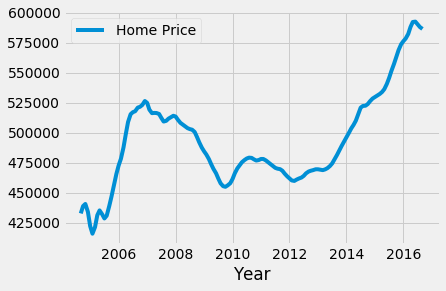

In [61]:
#Plots the appreciation of houses over time for a given city
def plot_appreciation(city, tbl):
    
    prices, start_date = get_prices_and_start_date(city)
    city_home_prices_float = np.array([float(price) for price in prices])
    
    column_names = list(home_prices)
    start_date_idx = column_names.index(start_date)
    
    years_string = column_names[start_date_idx:-1]
    years_int = np.array([convert_to_decimal_year(x) for x in years_string])
    
    df = pd.DataFrame({'Year': years_int, 'Home Price': city_home_prices_float})
    df.plot.line(x='Year', y='Home Price')
   
    
    
plot_appreciation("New York", home_prices)

I'd like to see what cities have appreciated the most from 1996 to 2016. Some of the cities will not show up because they are lacking a 1996 value, but that is ok for now. 

In [62]:
inital_prices = home_prices["1996-04"]
end_prices = home_prices["2016-08"]

appreciation_rate = ((end_prices - inital_prices)/inital_prices) * 100

home_prices["Appreciation (%)"] = appreciation_rate
sorted_appreciation = home_prices.sort_values(by="Appreciation (%)", ascending=False)
sorted_appreciation

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,Start Year of Data,Appreciation (%)
583,26374,Palo Alto,CA,San Jose,Santa Clara,584,436200.0,437400.0,439300.0,442600.0,...,2474100,2489200,2499200,2499900,2491700,2484400,2481700,2479200,1996-04,468.363136
2095,52842,Laguna Beach,CA,Los Angeles-Long Beach-Anaheim,Orange,2096,348700.0,354000.0,362400.0,371200.0,...,1608900,1669800,1742300,1787100,1805500,1838100,1901500,1963900,1996-07,463.206194
1264,19177,Manhattan Beach,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1265,428000.0,434400.0,438900.0,442700.0,...,2130000,2137200,2160800,2186100,2193400,2184800,2175300,2169400,1996-04,406.869159
1245,48424,West Hollywood,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1246,144700.0,144500.0,142600.0,141700.0,...,690400,698300,703300,708700,712900,716100,717500,717800,1996-04,396.060815
481,32999,Mountain View,CA,San Jose,Santa Clara,482,294100.0,293300.0,292700.0,293400.0,...,1385800,1401100,1416100,1423400,1422200,1423700,1426700,1428300,1996-04,385.651139
9211,14029,Sullivans Island,SC,Charleston,Charleston,9212,337400.0,333300.0,331800.0,332700.0,...,1532400,1558000,1572000,1580400,1584500,1592800,1599500,1600900,1996-04,374.481328
6659,4905,Glen Ellen,CA,Santa Rosa,Sonoma,6660,214500.0,216700.0,218800.0,218500.0,...,909800,922300,947600,975700,993500,1002300,1010500,1011300,1996-04,371.468531
366,26964,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,367,286800.0,285900.0,283400.0,282800.0,...,1293100,1306100,1316000,1330500,1348300,1356500,1352900,1348300,1996-04,370.118550
182,54626,Sunnyvale,CA,San Jose,Santa Clara,183,298200.0,299700.0,301000.0,301800.0,...,1351000,1364900,1379700,1388000,1389500,1390500,1393400,1395700,1996-04,368.041583
1066,39748,Menlo Park,CA,San Francisco,San Mateo,1067,419200.0,421300.0,422500.0,424400.0,...,1959700,1984100,1996400,2006500,2011100,2002900,1981100,1959700,1996-04,367.485687


Here we can see that out of the top ten results of the highest appreciation rate, nine are from the state of California. Is this because homes in california have actually appreciated the most of anywhere else in the United States? Or is this because the data itself is biased, and many states lack data until much later years? For example, I know from personal experience that New York City has appreciated a lot over the past 20 years. However, it will not show up in the above table because it is missing data until 2004.

Let us look at the when the data first started being recorded for most of these states. We can look at the completeness of data by state. If California is near the bottom of the list, it could be that california data is the most complete and that our appreciation model may just be being influenced by that.

In [63]:
#convey this in years of data per state, not in nans
complete_years_data = []

end = convert_to_decimal_year("2016-08")

for start_year in home_prices["Start Year of Data"]:
    start = convert_to_decimal_year(start_year)
    years_of_data = end - start
    complete_years_data.append(years_of_data)
    
home_prices["Years of Complete Data"] = complete_years_data


mean_completeness = home_prices[["State", "Years of Complete Data"]].groupby("State").mean()
mean_completeness.sort_values(by="Years of Complete Data", ascending=False)

,Years of Complete Data
State,
DE,20.340000
UT,20.329880
MA,20.327611
RI,20.306500
AR,20.304737
CT,20.202567
NJ,20.046772
MD,19.894357
NV,19.671538


I would like to calculate the median number of years of data so I have a frame of reference of where California is compared to the rest of the US.

In [64]:
np.median(mean_completeness["Years of Complete Data"])

18.49695740365123

I was also curious about how many of the top 30 appreciation values belong to the state of California,

In [65]:
first_thirty = sorted_appreciation[:30]
num_CA = len(first_thirty[(first_thirty['State']=="CA")].index)   
num_CA

27

California has about 19.5 years of data per city, which compares with an median of 18.5 years of data for the united states. Out of all the states, California has the 12th highest number of missing values. We can say that California does have more complete datasets than other states, and this is a possible contributing factor to California's high appreciation rate. However, other states that rank similarly to california in terms of missingness do not show up in the top appreciation rates. In fact, out of the top thirty appreciations, 27 are from California. It is highly unlikey that this occured by chance and is more likely to have arisen from other factors. Such factors could be Prop 13, a short supply of housing, favorable weather, and high paying employers in the entertainment and tech industries that drive up home prices in California. 